<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Transfer_learning_Scaling_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**GETTING HELPER FUNCTIONS**

In [1]:
!wget https://raw.githubusercontent.com/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/main/helper_functions_py.py

--2021-11-06 11:13:33--  https://raw.githubusercontent.com/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/main/helper_functions_py.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5983 (5.8K) [text/plain]
Saving to: ‘helper_functions_py.py’

helper_functions_py 100%[===================>]   5.84K  --.-KB/s    in 0s      

2021-11-06 11:13:34 (40.0 MB/s) - ‘helper_functions_py.py’ saved [5983/5983]



###**GETTING DATA**

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2021-11-06 11:13:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   171MB/s    in 8.8s    

2021-11-06 11:13:43 (176 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [3]:
from helper_functions_py import unzip_data,walk_through,random_augumented_img_plotter,random_img_plotter

In [4]:
unzip_data("/content/101_food_classes_10_percent.zip")

In [5]:
walk_through("/content/101_food_classes_10_percent")

THERE ARE 2 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 101 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES 

In [6]:
import tensorflow as tf

In [7]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("/content/101_food_classes_10_percent/train",
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/101_food_classes_10_percent/test",
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224),
                                                                shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


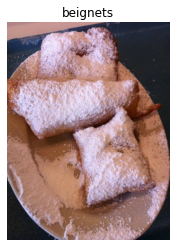

In [8]:
random_img_plotter("/content/101_food_classes_10_percent/train",train_data.class_names)

###**BUILDING THE DATA AUGUMENTATION LAYER**

In [9]:
from tensorflow.keras.layers.experimental import preprocessing
data_aug_layer = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2)
])

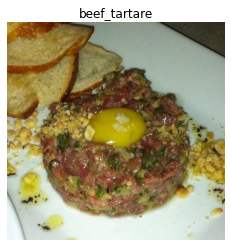

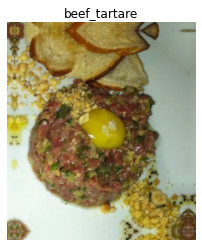

In [10]:
random_augumented_img_plotter("/content/101_food_classes_10_percent/train",train_data.class_names,data_aug_layer)

###**BUILDING OUR MODEL - using feature extraction**

In [11]:
base_layer = tf.keras.applications.EfficientNetB0(include_top=False)
base_layer.trainable = False
inputs = tf.keras.Input(shape = (224,224,3))
x = data_aug_layer(inputs)
x = base_layer(x,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(101,activation="softmax")(x)
model = tf.keras.Model(inputs,outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [12]:
model.compile(loss = "categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics = "accuracy")

In [13]:
initial_epochs = 5
history = model.fit(train_data,
          epochs = initial_epochs,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = int(0.15*len(test_data)),
          callbacks = [tf.keras.callbacks.ModelCheckpoint("modelckpt",save_best_only=True,save_weights_only=True)])

Epoch 1/5
237/237 [==============================] - 156s 504ms/step - loss: 3.4756 - accuracy: 0.2504 - val_loss: 2.6917 - val_accuracy: 0.3843
Epoch 2/5
237/237 [==============================] - 94s 394ms/step - loss: 2.3819 - accuracy: 0.4536 - val_loss: 2.2009 - val_accuracy: 0.4695
Epoch 3/5
237/237 [==============================] - 82s 345ms/step - loss: 2.0048 - accuracy: 0.5222 - val_loss: 2.0760 - val_accuracy: 0.4804
Epoch 4/5
237/237 [==============================] - 81s 339ms/step - loss: 1.7960 - accuracy: 0.5649 - val_loss: 1.9851 - val_accuracy: 0.4950
Epoch 5/5
237/237 [==============================] - 77s 325ms/step - loss: 1.6509 - accuracy: 0.5913 - val_loss: 1.9174 - val_accuracy: 0.5042


###**EVALUATING OUR MODEL**

In [14]:
model.evaluate(test_data)

790/790 [==============================] - 101s 127ms/step - loss: 1.7202 - accuracy: 0.5509


[1.7201929092407227, 0.5509306788444519]

In [15]:
from helper_functions_py import compare_history,plot_curves

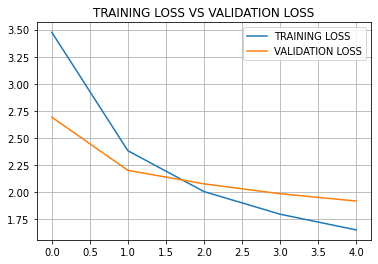

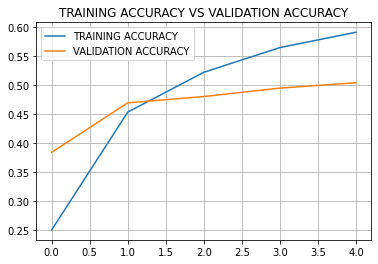

In [16]:
plot_curves(history)

###**FINE TUNING OUR MODEL**

In [17]:
for index, layer in enumerate(model.layers):
  print(index, layer.name, layer.trainable)

0 input_2 True
1 sequential True
2 efficientnetb0 False
3 global_average_pooling2d True
4 dense True


In [18]:
for index,layer in enumerate(base_layer.layers):
  print(index, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [19]:
#lets unfreeze the top 5 layers
for layer in base_layer.layers[-5:]:
  layer.trainable = True

In [20]:
for index, layer in enumerate(base_layer.layers):
  print(index, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [21]:
model.compile(loss = "categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = "accuracy")
for layer in model.layers[2].layers:
  print(layer.name,layer.trainable)

input_1 False
rescaling False
normalization False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False
blo

In [22]:
total_epochs = 5 + initial_epochs
historyft = model.fit(train_data,
                      epochs = total_epochs,
                      steps_per_epoch = len(train_data),
                      initial_epoch = history.epoch[-1],
                      validation_data = test_data,
                      validation_steps = int(0.15*len(test_data)),
                      callbacks = [tf.keras.callbacks.ModelCheckpoint("modelckpt",save_best_only=True,save_weights_only=True)])

Epoch 5/10
237/237 [==============================] - 79s 299ms/step - loss: 1.4831 - accuracy: 0.6473 - val_loss: 1.8968 - val_accuracy: 0.5119
Epoch 6/10
237/237 [==============================] - 70s 293ms/step - loss: 1.4423 - accuracy: 0.6569 - val_loss: 1.8956 - val_accuracy: 0.5109
Epoch 7/10
237/237 [==============================] - 69s 289ms/step - loss: 1.4385 - accuracy: 0.6566 - val_loss: 1.8898 - val_accuracy: 0.5130
Epoch 8/10
237/237 [==============================] - 66s 277ms/step - loss: 1.4277 - accuracy: 0.6581 - val_loss: 1.8890 - val_accuracy: 0.5119
Epoch 9/10
237/237 [==============================] - 64s 269ms/step - loss: 1.4056 - accuracy: 0.6644 - val_loss: 1.8784 - val_accuracy: 0.5140
Epoch 10/10
237/237 [==============================] - 64s 268ms/step - loss: 1.3994 - accuracy: 0.6701 - val_loss: 1.8783 - val_accuracy: 0.5122


###**EVALUATING OUR FINE TUNED MODEL**

In [23]:
model.evaluate(test_data)

790/790 [==============================] - 101s 127ms/step - loss: 1.6686 - accuracy: 0.5633


[1.6686482429504395, 0.5632871389389038]

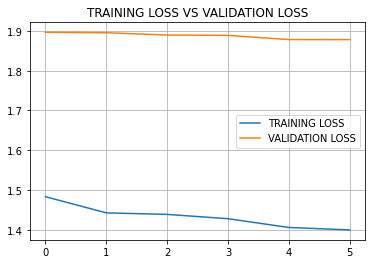

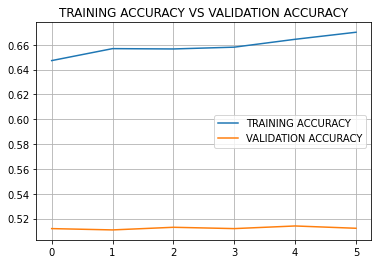

In [24]:
plot_curves(historyft)

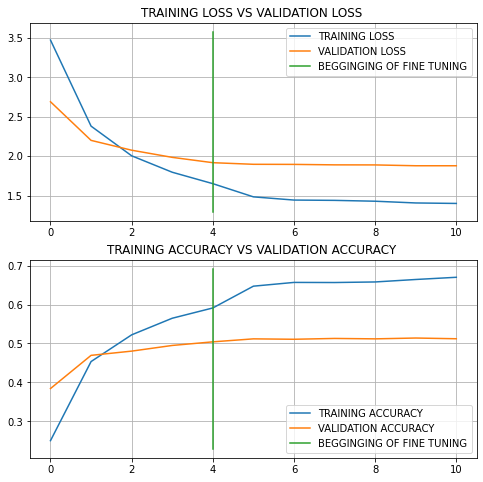

In [25]:
compare_history(history,historyft)

In [26]:
y_labels = []
i = 0
for images,labels in test_data.unbatch():
  if(i==0):
    print(labels.shape)
    i+=1
  y_labels.append(labels.numpy().argmax())

(101,)


In [27]:
len(y_labels)

25250

In [28]:
y_pred = model.predict(test_data)

In [29]:
y_pred = y_pred.argmax(axis = 1)
y_pred[:10]

array([ 0,  0,  0, 38,  8, 78, 29, 46,  9,  0])

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_labels,y_pred)

###**PLOTTING CONFUSION MATRIX**

In [31]:
def plot_confusion_matrix(cm,class_names,figsize=(12,12)):
  '''
  Args: confusion matrix, list of classes and a tuple of the size of plot
  function: plots a confusion matrix using seaborn heatmap
  returns: none
  '''
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np 
  plt.figure(figsize=figsize)
  sns.heatmap(cm,
              annot=True,
              fmt='.2f',
              linewidths = 0.5,
              square=True,
              cbar = True,
              cmap = "Blues",
              xticklabels=class_names,
              yticklabels=class_names
              )
  plt.xlabel("PREDICET LABEL")
  plt.ylabel("ACTUAL LABEL")

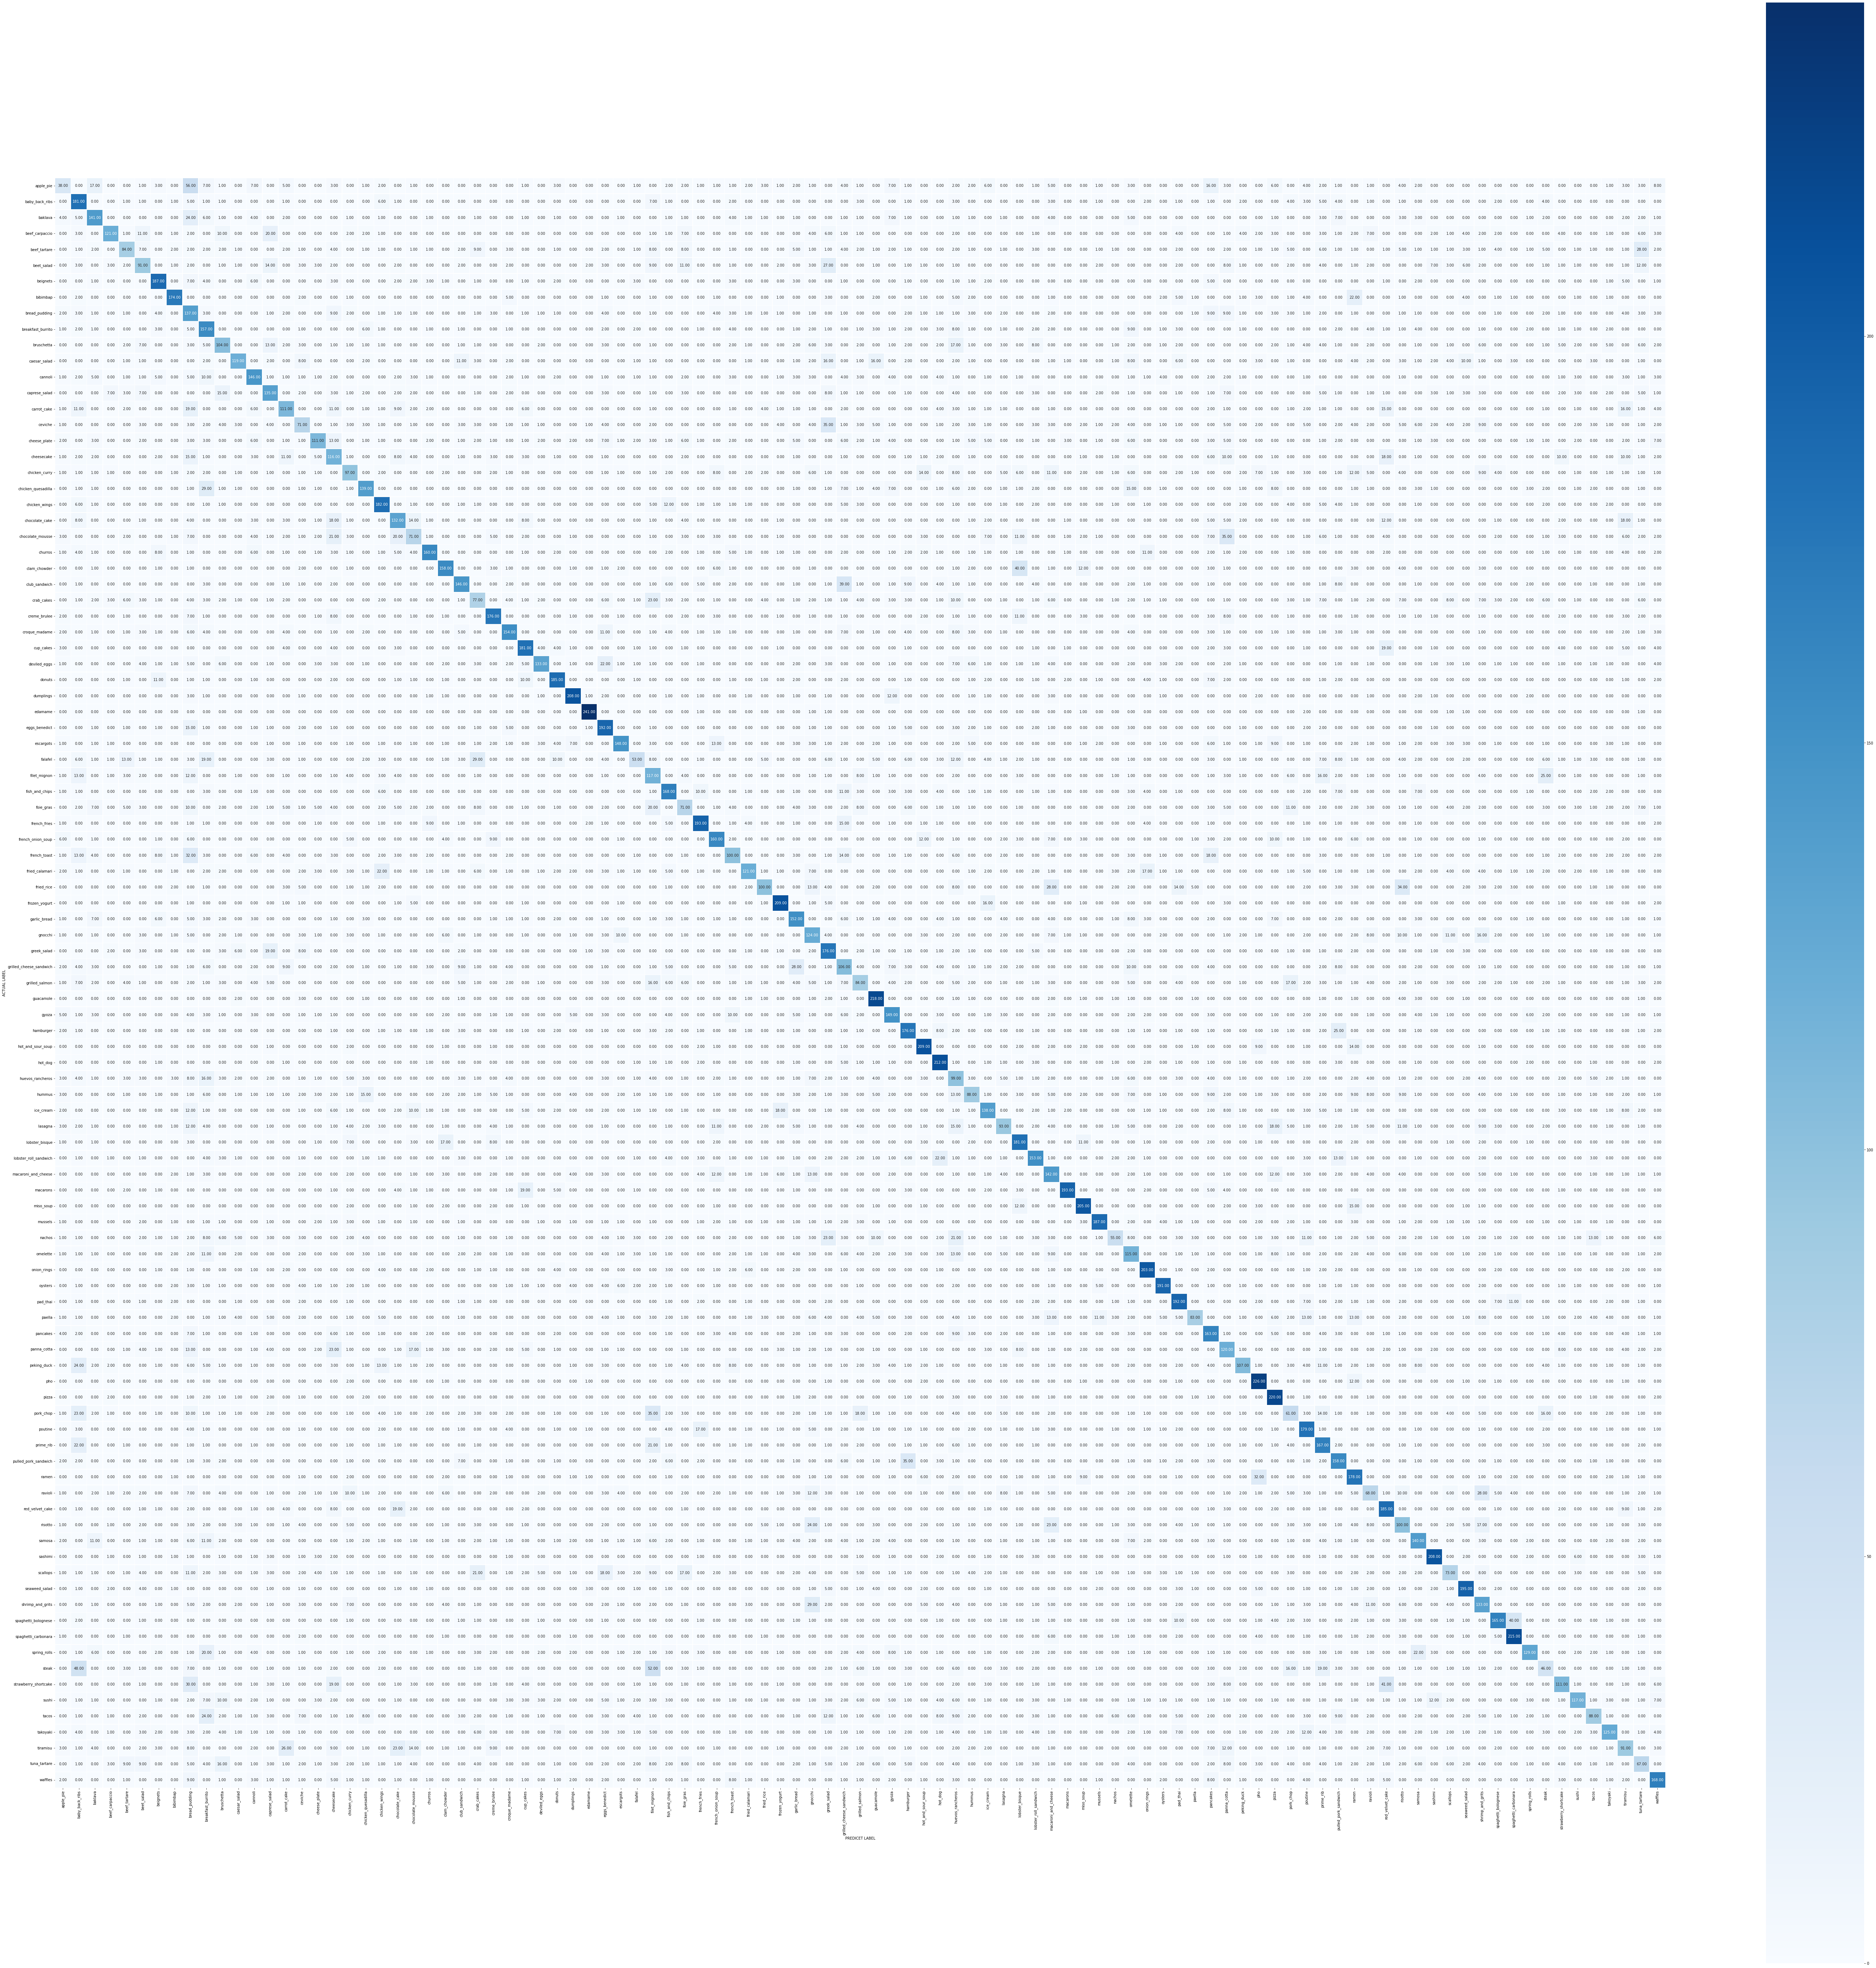

In [32]:
plot_confusion_matrix(cm,train_data.class_names,figsize=(100,100))

###**PLOTTING F1-SCORES FROM sklearn.metrics.classification_report**

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_labels,y_pred,output_dict=True)
report

{'0': {'f1-score': 0.2037533512064343,
  'precision': 0.3089430894308943,
  'recall': 0.152,
  'support': 250},
 '1': {'f1-score': 0.5276967930029154,
  'precision': 0.4151376146788991,
  'recall': 0.724,
  'support': 250},
 '10': {'f1-score': 0.4342379958246347,
  'precision': 0.45414847161572053,
  'recall': 0.416,
  'support': 250},
 '100': {'f1-score': 0.6292134831460674,
  'precision': 0.5915492957746479,
  'recall': 0.672,
  'support': 250},
 '11': {'f1-score': 0.5776699029126213,
  'precision': 0.7345679012345679,
  'recall': 0.476,
  'support': 250},
 '12': {'f1-score': 0.5971370143149285,
  'precision': 0.6108786610878661,
  'recall': 0.584,
  'support': 250},
 '13': {'f1-score': 0.5212355212355212,
  'precision': 0.503731343283582,
  'recall': 0.54,
  'support': 250},
 '14': {'f1-score': 0.47639484978540775,
  'precision': 0.5138888888888888,
  'recall': 0.444,
  'support': 250},
 '15': {'f1-score': 0.331002331002331,
  'precision': 0.39664804469273746,
  'recall': 0.284,
  '

In [34]:
class_f1scores = {}
for k,v in report.items():
  if k=="accuracy":
    break
  else:
    class_f1scores[train_data.class_names[int(k)]] = v["f1-score"]

In [35]:
class_f1scores

{'apple_pie': 0.2037533512064343,
 'baby_back_ribs': 0.5276967930029154,
 'baklava': 0.5685483870967741,
 'beef_carpaccio': 0.5960591133004927,
 'beef_tartare': 0.4087591240875913,
 'beet_salad': 0.4017660044150111,
 'beignets': 0.727626459143969,
 'bibimbap': 0.7631578947368421,
 'bread_pudding': 0.31676300578034683,
 'breakfast_burrito': 0.4583941605839416,
 'bruschetta': 0.4342379958246347,
 'caesar_salad': 0.5776699029126213,
 'cannoli': 0.5971370143149285,
 'caprese_salad': 0.5212355212355212,
 'carrot_cake': 0.47639484978540775,
 'ceviche': 0.331002331002331,
 'cheese_plate': 0.5375302663438256,
 'cheesecake': 0.39255499153976314,
 'chicken_curry': 0.42637362637362636,
 'chicken_quesadilla': 0.595289079229122,
 'chicken_wings': 0.6703499079189686,
 'chocolate_cake': 0.5176470588235295,
 'chocolate_mousse': 0.3325526932084309,
 'churros': 0.700218818380744,
 'clam_chowder': 0.6610878661087867,
 'club_sandwich': 0.610878661087866,
 'crab_cakes': 0.33771929824561403,
 'creme_brulee'

In [37]:
import pandas as pd
class_f1scores = pd.DataFrame({"class_names":list(class_f1scores.keys()),
                               "f1_scores":list(class_f1scores.values())}).sort_values("f1_scores",ascending = False)

In [38]:
class_f1scores

,class_names,f1_scores
33,edamame,0.954455
63,macarons,0.844639
32,dumplings,0.827038
86,sashimi,0.820513
45,frozen_yogurt,0.819608
...,...,...
36,falafel,0.302857
99,tuna_tartare,0.294505
77,pork_chop,0.282407
93,steak,0.228288


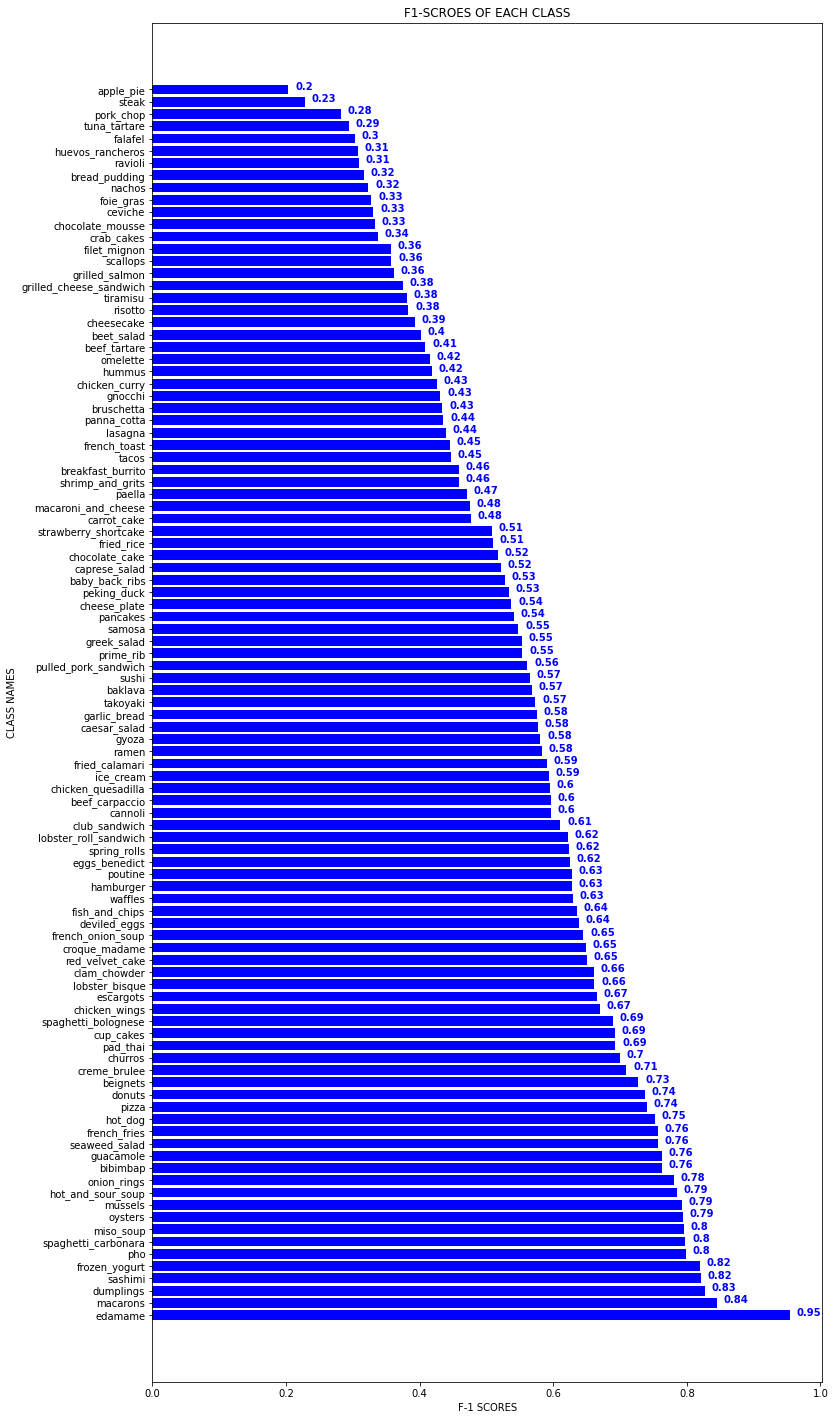

In [51]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,25))
scores = plt.barh(class_f1scores["class_names"],class_f1scores["f1_scores"],color = "blue")
plt.title("F1-SCROES OF EACH CLASS")
plt.xlabel("F-1 SCORES")
plt.ylabel("CLASS NAMES")
#this is how you put text on bars
for i, v in enumerate(class_f1scores["f1_scores"]):
  ax.text(v + 0.01 , i , str(np.round(v,decimals=2)), color='blue', fontweight='bold')

###**VISUALIZING THE PREDICTIONS OF OUR MODEL**

In [64]:
#creating a function to load and prepare our data
def load_prep_image(filename,scale = False,img_size = 224):
  img = tf.io.read_file(filename=filename)
  img = tf.io.decode_image(img,channels = 3)
  img = tf.image.resize(img,[img_size,img_size])
  if(scale):
    return img/255.
  else:
    return img

In [109]:
#creating a function to plot random image and the prediction of our model
def random_img_prediction_plotter(model,dir,class_names):
  '''
  Args: model, name of the directory from where we can choose the random images and class names
  function: select 3 random images and plot them along with the prediction of the given model
  returns: none
  '''
  import os
  import random
  import matplotlib.image as mpimg
  plt.figure(figsize=(17,10))
  for j in range(3):
    i = random.choice(class_names)
    target = dir + "/" + i
    random_img = random.choice(os.listdir(target))
    target = target + "/" + random_img
    img = load_prep_image(target)
    pred = model.predict(tf.expand_dims(img,axis=0))
    pred_prob = np.round(np.amax(pred),decimals=2)
    predicted_class = class_names[pred.argmax()]
    #plotting
    plt.subplot(1,3,j+1)
    plt.imshow(img/255.)
    plt.axis("off")
    if(predicted_class == i):
      plt.title(f"ACTUAL:{i} PRED:{predicted_class} PROB:{pred_prob:.2f}",c = "g")
    else:
      plt.title(f"ACTUAL:{i} PRED:{predicted_class} PROB:{pred_prob:.2f}",c = "r")

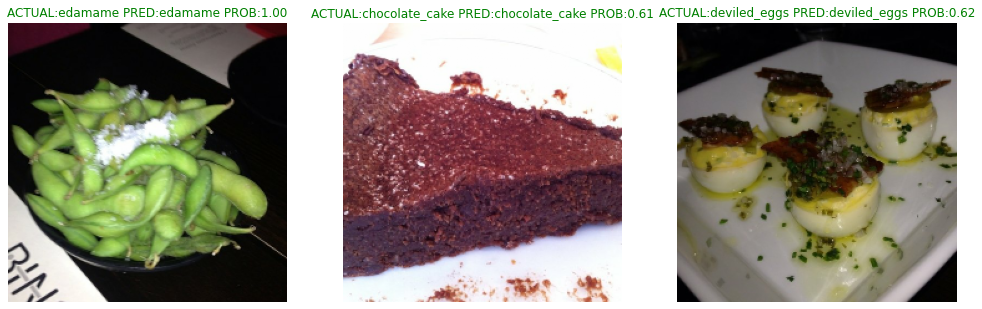

In [112]:
random_img_prediction_plotter(model,"/content/101_food_classes_10_percent/test",train_data.class_names)

###**VISUALIZING THE PREDICTIONS THAT WERE WRONG WITH HIGHEST PROBABILITIES**
* FIRST, WE WILL CREATE A PANDAS DATAFRAME
* THEN WE WILL GET THE PREDICTIONS THAT WERE INCORRECT WITH HIGHEST PROBABILITY SCORES
* THEN WE WILL VISUALIZE THE TOP FEW PREDICTIONS THAT WERE INCORRECT

In [124]:
filepaths = []
# '*' below means all
for i in tf.data.Dataset.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",shuffle=False):
  filepaths.append(i.numpy())

In [125]:
filepaths

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/116705.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1167170.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1174330.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1180600.jpg',
 b'/content/101_food_classes_10_percen

In [130]:
proba = model.predict(test_data)

In [131]:
pred_proba = proba.max(axis=1)

In [134]:
pred_proba = np.round(pred_proba,decimals=2)
pred_proba

array([0.21, 0.84, 0.15, ..., 0.23, 0.27, 0.22], dtype=float32)

In [136]:
pred_df = pd.DataFrame({"imgpaths":filepaths,
                        "ytrue":y_labels,
                        "y_pred":y_pred,
                        "pred_prob":pred_proba,
                        "y_true_names":[train_data.class_names[i] for i in y_labels], #THIS IS HOW YOU ITERATE 
                        "y_pred_names":[train_data.class_names[i] for i in y_pred]  #THIS IS HOW YOU ITERATE
                        })
pred_df.head(800)

,imgpaths,ytrue,y_pred,pred_prob,y_true_names,y_pred_names
0,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.21,apple_pie,apple_pie
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.84,apple_pie,apple_pie
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.15,apple_pie,apple_pie
3,b'/content/101_food_classes_10_percent/test/ap...,0,38,0.13,apple_pie,fish_and_chips
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.19,apple_pie,bread_pudding
...,...,...,...,...,...,...
795,b'/content/101_food_classes_10_percent/test/be...,3,13,0.23,beef_carpaccio,caprese_salad
796,b'/content/101_food_classes_10_percent/test/be...,3,3,0.82,beef_carpaccio,beef_carpaccio
797,b'/content/101_food_classes_10_percent/test/be...,3,89,0.32,beef_carpaccio,shrimp_and_grits
798,b'/content/101_food_classes_10_percent/test/be...,3,76,0.21,beef_carpaccio,pizza


In [139]:
pred_df["correct_pred"] = pred_df["y_pred"] == pred_df["ytrue"]
pred_df

,imgpaths,ytrue,y_pred,pred_prob,y_true_names,y_pred_names,correct_pred
0,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.21,apple_pie,apple_pie,True
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.84,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.15,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ap...,0,38,0.13,apple_pie,fish_and_chips,False
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.19,apple_pie,bread_pudding,False
...,...,...,...,...,...,...,...
25245,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.82,waffles,waffles,True
25246,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.78,waffles,waffles,True
25247,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.23,waffles,waffles,True
25248,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.27,waffles,waffles,True


In [142]:
pred_final_df = pred_df[pred_df["correct_pred"]==False].sort_values("pred_prob",ascending=False)
pred_final_df.head(27)

,imgpaths,ytrue,y_pred,pred_prob,y_true_names,y_pred_names,correct_pred
23797,b'/content/101_food_classes_10_percent/test/su...,95,86,0.99,sushi,sashimi,False
10847,b'/content/101_food_classes_10_percent/test/fr...,43,68,0.98,fried_calamari,onion_rings,False
23631,b'/content/101_food_classes_10_percent/test/st...,94,83,0.98,strawberry_shortcake,red_velvet_cake,False
11041,b'/content/101_food_classes_10_percent/test/fr...,44,51,0.96,fried_rice,guacamole,False
10854,b'/content/101_food_classes_10_percent/test/fr...,43,68,0.96,fried_calamari,onion_rings,False
15826,b'/content/101_food_classes_10_percent/test/ma...,63,29,0.95,macarons,cup_cakes,False
14482,b'/content/101_food_classes_10_percent/test/hu...,57,51,0.95,hummus,guacamole,False
15359,b'/content/101_food_classes_10_percent/test/lo...,61,53,0.95,lobster_roll_sandwich,hamburger,False
14691,b'/content/101_food_classes_10_percent/test/ic...,58,79,0.95,ice_cream,prime_rib,False
18001,b'/content/101_food_classes_10_percent/test/pa...,72,67,0.95,pancakes,omelette,False


In [174]:
def plot_most_incorrect_pred(target,actual_class,class_names = train_data.class_names):
  img = load_prep_image(target)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_prob = np.round(np.amax(pred),decimals=2)
  predicted_class = class_names[pred.argmax()]
  #plotting
  plt.imshow(img/255.)
  plt.axis("off")
  if(predicted_class == actual_class):
    plt.title(f"ACTUAL:{actual_class} PRED:{predicted_class} PROB:{pred_prob:.2f}",c = "g")
  else:
    plt.title(f"ACTUAL:{actual_class} PRED:{predicted_class} PROB:{pred_prob:.2f}",c = "r")

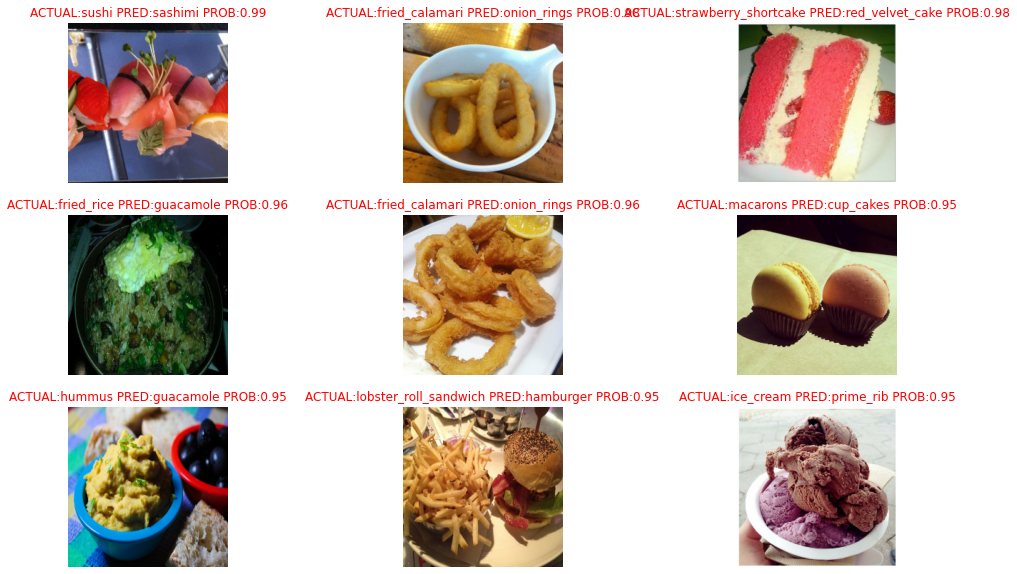

In [185]:
plt.figure(figsize=(17,10))
for i,j in enumerate(pred_final_df["imgpaths"][:9]):
  plt.subplot(3,3,i+1)
  plot_most_incorrect_pred(j,actual_class=pred_final_df.to_numpy()[i,4])